In [55]:
import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from PIL import Image

In [2]:
import zipfile
import pandas as pd
import os

zip_file_path = r"C:\Users\sanja\Downloads\mnist.zip"
output_dir_path = r"C:\Users\sanja\Downloads\mnist_extract"

def unzip(zip_file_path, output_dir_path):
    """
    Unzips the specified zip file into the specified directory.
    
    Parameters:
    zip_file_path (str): The path to the zip file.
    output_dir_path (str): The directory where the contents will be extracted.
    """
    print(f"Unzipping {zip_file_path} to {output_dir_path}...")
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        zip_ref.extractall(output_dir_path)
    print("Data uncompressed successfully...")

def read_image_files(output_dir_path):
    """
    Reads all image files from the specified directory using os.walk and returns
    a list of dictionaries. Each dictionary contains the file name and its path.
    
    Parameters:
    output_dir_path (str): The directory to search for image files.
    
    Returns:
    list: A list of dictionaries with file name and path.
    """
    files_data = []
    print(f"Searching for image files in {output_dir_path}...")
    for root, dirs, files in os.walk(output_dir_path):
        print(f"Reading image files from {root}... Detected {len(files)} files in {root} directory.")
        for file_name in files:
            if file_name.lower().endswith((".png", ".jpg", ".jpeg", ".gif", ".bmp")):
                file_path = os.path.join(root, file_name)
                print(f"Processing file: {file_path}")
                files_data.append({"file_name": file_name, "file_path": file_path})
    if not files_data:
        print("No image files found.")
    return files_data

def load_into_df(files_data):
    """
    Loads the list of dictionaries into a pandas DataFrame.
    
    Parameters:
    files_data (list): The list of dictionaries to load into the DataFrame.
    
    Returns:
    DataFrame: The resulting pandas DataFrame.
    """
    if files_data:
        df = pd.DataFrame(files_data)
        print("DataFrame created successfully.")
    else:
        df = pd.DataFrame()
        print("No image files found, empty DataFrame created.")
    return df

unzip(zip_file_path, output_dir_path)
files_data = read_image_files(output_dir_path)
print(f"Total image files processed: {len(files_data)}")
df = load_into_df(files_data)
print(df)

Unzipping C:\Users\sanja\Downloads\mnist.zip to C:\Users\sanja\Downloads\mnist_extract...
Data uncompressed successfully...
Searching for image files in C:\Users\sanja\Downloads\mnist_extract...
Reading image files from C:\Users\sanja\Downloads\mnist_extract... Detected 0 files in C:\Users\sanja\Downloads\mnist_extract directory.
Reading image files from C:\Users\sanja\Downloads\mnist_extract\New folder... Detected 0 files in C:\Users\sanja\Downloads\mnist_extract\New folder directory.
Reading image files from C:\Users\sanja\Downloads\mnist_extract\New folder\A... Detected 13870 files in C:\Users\sanja\Downloads\mnist_extract\New folder\A directory.
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\A\A-0.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\A\A-1.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\A\A-10.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\A\A-100.png
Processing file: C:\Users\sanja

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-8971.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-8972.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-8973.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-8974.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-8975.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-8976.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-8977.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-8978.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-8979.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-898.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-8980.png
Processing file: C:\Users\sanja\Downloads\mnist_extract\New folder\S\S-8981.png
Processing file: C:\Users\sanja\Downloads

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



DataFrame created successfully.
         file_name                                          file_path
0          A-0.png  C:\Users\sanja\Downloads\mnist_extract\New fol...
1          A-1.png  C:\Users\sanja\Downloads\mnist_extract\New fol...
2         A-10.png  C:\Users\sanja\Downloads\mnist_extract\New fol...
3        A-100.png  C:\Users\sanja\Downloads\mnist_extract\New fol...
4       A-1000.png  C:\Users\sanja\Downloads\mnist_extract\New fol...
...            ...                                                ...
372446   Z-995.png  C:\Users\sanja\Downloads\mnist_extract\New fol...
372447   Z-996.png  C:\Users\sanja\Downloads\mnist_extract\New fol...
372448   Z-997.png  C:\Users\sanja\Downloads\mnist_extract\New fol...
372449   Z-998.png  C:\Users\sanja\Downloads\mnist_extract\New fol...
372450   Z-999.png  C:\Users\sanja\Downloads\mnist_extract\New fol...

[372451 rows x 2 columns]


In [9]:
path = r"C:\Users\sanja\Downloads\mnist_extract\New folder"

In [10]:
def vectorize_image_files(path):
    image_vectors = []
    image_labels = []
    # Get the list of folder names (labels)
    labels = [dir_name for dir_name in os.listdir(path) if os.path.isdir(os.path.join(path, dir_name))]
    for label in labels:
        label_dir = os.path.join(path, label)
        # Ensure the directory exists
        if os.path.isdir(label_dir):
            # Iterate through each image in the directory
            for image_file in os.listdir(label_dir):
                image_file_path = os.path.join(label_dir, image_file)
                with Image.open(image_file_path) as img:
                    #### Vectorize ####
                    img_arr = np.array(img)
                    image_vector = img_arr.ravel()
                    ###################
                    image_vectors.append(image_vector)
                    image_labels.append(label)
    return image_vectors, image_labels


def load_vectors_into_df(image_vectors, image_labels):
    df = pd.DataFrame(image_vectors, columns=[f"pixel_{i}" for i in range(len(image_vectors[0]))])
    df['labels'] = image_labels
    return df 

In [13]:
image_vectors, image_labels = vectorize_image_files(path)

image_df = load_vectors_into_df(image_vectors, image_labels)

image_df.head()

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  labels  
0          0          0          0          0          0       A  
1          0          0          0          0          0       A  
2          0          0          0          0          0       A  
3          0          0          0          0          0       A  
4          0          0          0          0          0       A  

[5 rows x 785 columns]

### Target Variable

<Axes: xlabel='labels', ylabel='count'>

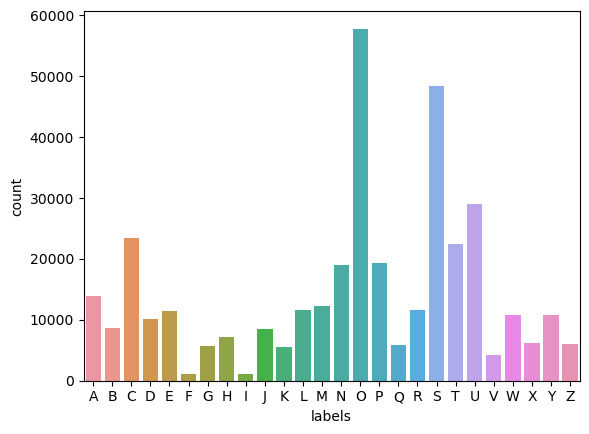

In [19]:
sns.countplot(data = image_df,x = image_df["labels"])

Randomly Generated index: 263816
Label of image at 263816 index: S

Data Type of Image Array: object
Image Array:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 19 143 213 208 198 166 117 15 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 7 130 241 187 91 55 58 107 204 237 80 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 24 190 202 58 1 0 0 0 0 2 66 234 88 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 179 199 17 0 0 0 0 0 0 0 0 101 207 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 129 213 15 0 0 0 0 0 0 0 0 0 20 240 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 9 224 70 0 0 0 0 0 0 0 0 0 0 0 161 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 77 255 12 0 0 0 0 0 0 0 0 0 0 8 108 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 73 255 12 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 7 204 145 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 33 222 168 8 0 0 0 0

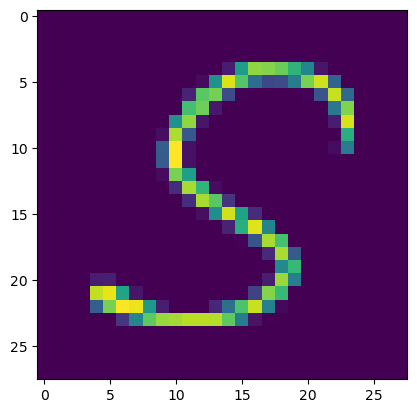

In [58]:
idx = np.random.randint(0, 372451)

print("Randomly Generated index:", idx)

print(f"Label of image at {idx} index:", image_df.iloc[idx, -1])
print()

img = np.reshape(image_df.iloc[idx, 0:-1], (28,28))
print("Data Type of Image Array:", img.dtype)
print("Image Array:\n", img)

img = img.astype("float")

plt.imshow(img)

In [23]:
image_df.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778', 'pixel_779',
       'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783', 'labels'],
      dtype='object', length=785)

### Seggregate Input and Outputs

In [25]:
X = image_df.drop(columns="labels")

In [26]:
y = image_df[["labels"]]

### Split the Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [29]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(260715, 784) (111736, 784)
(260715, 1) (111736, 1)


### Data Preparation

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
norm = MinMaxScaler()

In [36]:
X_trian_transformed = pd.DataFrame(norm.fit_transform(X_train),
                                  columns=norm.get_feature_names_out(),
                                  index = X_train.index)

In [37]:
X_test_transformed = pd.DataFrame(norm.transform(X_test),
                                 columns= norm.get_feature_names_out(),
                                 index = X_test.index)

### Model Building

#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log = LogisticRegression()

In [41]:
log.fit(X_trian_transformed, y_train)

C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_predict = log.predict(X_test_transformed)

In [43]:
from sklearn import metrics

In [61]:
A = metrics.accuracy_score(y_predict,y_test)

### Decesion Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dec = DecisionTreeClassifier()

In [48]:
dec.fit(X_trian_transformed,y_train)

DecisionTreeClassifier()

In [49]:
y_pred = dec.predict(X_test_transformed)

In [62]:
B =  metrics.accuracy_score(y_pred,y_test)

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier()

In [53]:
rf.fit(X_trian_transformed,y_train)

C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [59]:
y_pred1 = rf.predict(X_test_transformed)

In [63]:
C = metrics.accuracy_score(y_pred1,y_test)

## KNN

In [77]:
!pip install threadpoolctl==3.1.0

In [78]:
import threadpoolctl

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier(n_neighbors=3)

In [81]:
knn.fit(X_trian_transformed,y_train)

C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

### Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB
naive_baye=GaussianNB()
naive_baye.fit(X_trian_transformed,y_train)

C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [86]:
y_pred2 = naive_baye.predict(X_test_transformed)

In [87]:
D = metrics.accuracy_score(y_pred2,y_test)

In [89]:
Algorithms = ["Logistic Regression","Decesion Tree","Random Forest","Naive Bayes"]

In [90]:
Accuracy_Score = [A , B , C , D]

<Axes: >

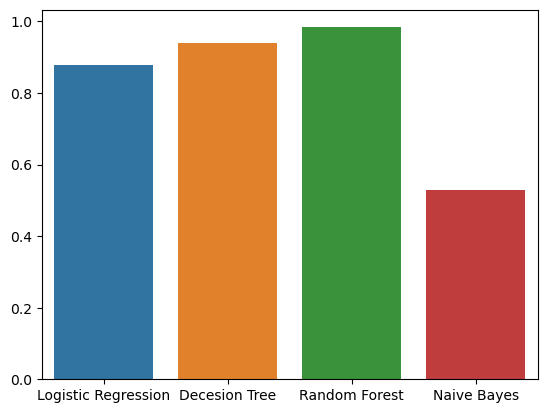

In [92]:
sns.barplot(x = Algorithms, y = Accuracy_Score)